# Exploratory Data Analysis

We will analyze ratings for beers from around the world in this notebook. The following are some of the questions this analsyis will try to explore.

1. Which countries have the most number of beers?
2. Which countries have the best beers? A beer will be considered 'best' if it has an average rating greater than 3.5.
3. Does the country of origin control the ratings?
4. Which states in the US have the best beers?
5. How do beers in the US compare with beers from the rest of the world?
6. What are some of the key parameters that affect the average ratings? ABV? Overall Score?Beer Style?

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [2]:
df1 = pd.read_csv('Allbeers.csv')

In [3]:
df1.shape

(220000, 12)

The total number of beers in the dataset is 220,000.

In [4]:
df1.head()

,Unnamed: 0,Name,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,City,State,Country,has_twitter,has_facebook
0,0,Närke Kaggen Stormaktsporter,9.5,4.489771,557,Imperial Stout,Microbrewery,Örebro,NaN,Sweden,0,0
1,1,Westvleteren 12 (XII),10.2,4.426578,3332,Abt/Quadrupel,Microbrewery,Westvleteren,NaN,Belgium,0,0
2,2,Schramm’s The Heart of Darkness,14.0,4.423655,77,Mead,Meadery,Ferndale,Michigan,United States,1,1
3,3,B. Nektar Ken Schramm Signature Series - The H...,14.0,4.421873,50,Mead,Meadery,Ferndale,Michigan,United States,1,1
4,4,Cigar City Pilot Series Dragonfruit Passion Fr...,0.0,4.420719,46,Berliner Weisse,Microbrewery,Tampa,Florida,United States,1,1


In [5]:
#drop unnamed column from the dataframe
df1.drop(["Unnamed: 0"], axis=1, inplace=True)

We have 11 columns in the dataset, with 3 numerical variables. The social media columns have been converted to binary columns during the cleaning process. Though the data was cleaned, we will take an other look as a check for missing values.

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220000 entries, 0 to 219999
Data columns (total 11 columns):
Name             220000 non-null object
ABV              220000 non-null float64
AverageRating    220000 non-null float64
RatingCount      220000 non-null int64
BeerStyle        220000 non-null object
BreweryType      220000 non-null object
City             219440 non-null object
State            138694 non-null object
Country          220000 non-null object
has_twitter      220000 non-null int64
has_facebook     220000 non-null int64
dtypes: float64(2), int64(3), object(6)
memory usage: 18.5+ MB


Other than the state column and city columns, the rest of the variables do not have any missing values, which is good. We are aware of the missing values and will deal with it later.

In [7]:
#remove leading white spaces in the country column
df1.Country = df1.Country.str.strip()

## Beers from the World

We will compare the beers from different countries in this section.

In [8]:
total_beers = df1.groupby('Country').Country.count()

In [9]:
total_beers

Country
Abkhazia                        5
Albania                        29
Algeria                        14
Andorra                        21
Angola                          3
Antigua & Barbuda               2
Argentina                     251
Armenia                        26
Aruba                           2
Australia                    2913
Austria                      1439
Azerbaijan                     12
Bahamas                        24
Bangladesh                      1
Barbados                       12
Belarus                       310
Belgium                      5492
Belize                          4
Benin                           3
Bermuda                         3
Bhutan                         24
Bolivia                        27
Bonaire                         1
Bosnia and Herzegovina         85
Botswana                        2
Brazil                        615
Bulgaria                      119
Burkina Faso                    5
Burundi                         2
Cambod

**The dataset contains beers from 209 countries.** There are some very interesting and not so commonly heard countries in the list such as Abkhazia, Togo and Turkmenistan. There are a few beers from North Korea too! **The most interesting is Transdniestra, which has its own government but is still not recognized as an independent country, but still has 13 different beers** 

**_DATA QUALITY_**

The most  number of beers is from countries like United States, Belgium, Sweden etc. There are about 88,228 beers from the United States alone and warrants an independent analysis. The data was obtained from a US based website, which may consequently lead to more beers from the US in the site. However, a cursory glance at the website shows that reviewers are from all over the world, which shows that the website is quite popular in other countries too. However, there may still be some bias in the data.

Lets loook at the 15 countries with most and least number of beers.

In [10]:
total_beers.sort_values(ascending=False).head(15)

Country
United States     88228
England           23402
Canada            14225
Germany           13129
Denmark            9644
Netherlands        5879
Sweden             5819
Belgium            5492
Poland             5090
Norway             3906
Scotland           3521
France             3183
Finland            3136
Spain              2970
Czech Republic     2928
Name: Country, dtype: int64

In [11]:
print ('The top 15 countries account for',round(total_beers.sort_values(ascending=False).head(15).sum()/220000 * 100,1),'% beers')

The top 15 countries account for 86.6 % beers


In [12]:
total_beers.sort_values().head(15)

Country
Lesotho                1
Liberia                1
Palau                  1
Haiti                  1
Guinea                 1
Bangladesh             1
Bonaire                1
São Tomé & Principe    1
Tajikistan             1
Syria                  1
Grenada                1
Gibraltar              1
Micronesia             1
Mayotte                1
Libya                  1
Name: Country, dtype: int64

The countries with most number of beers are from North America (Canada has quite a few beers too!) and Europe as expected. It is surprising to see that Australia is not in the list. There are coutries such as Libya and Bangladesh that have just 1 beer. It will be difficult to get any kind of meaningful statistics for comparison. These beers will be used for the the overall analysis to look at the effect of individual independent variables on the ratings.  

Since the top 15 countries account for approximately 87% of the beers, these have been selected for further comparison.

In [13]:
#create a separate dataframe with the top 15 countries
total_beers1 = dict(total_beers.sort_values(ascending=False).head(15))
countries = list(total_beers1.keys())
top_15 = pd.DataFrame()
for c in countries:
    top_15 = top_15.append(df1[df1.Country == c])

Now, we will look at the percentage of beers that have ratings greater than 3.5 for each country.

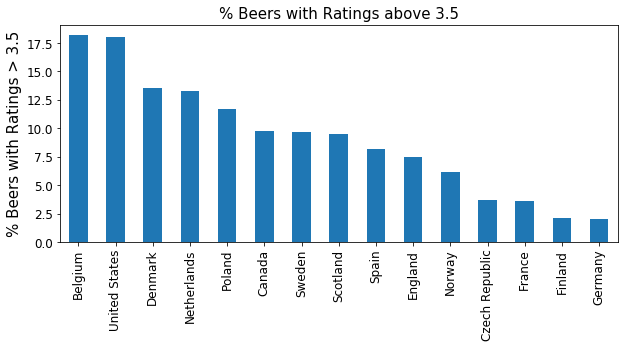

In [14]:
beer_count = total_beers.sort_values(ascending=False).head(15)
percent_beers = (top_15[top_15.AverageRating > 3.5]).groupby('Country').Country.count()
totalratingcount = top_15.groupby('Country').RatingCount.sum()
mean_abv = top_15.groupby('Country').ABV.mean()
df_toprated = pd.DataFrame(data=dict(TotalBeerCount=beer_count,RatingsAboveThresh=percent_beers,MeanABV=mean_abv,TotalRatingCount=totalratingcount))
df_toprated['Percentage'] = round((df_toprated.RatingsAboveThresh/df_toprated.TotalBeerCount)*100,1)
#print(df_toprated[['RatingsAboveThresh','TotalBeerCount','Percentage']])

plt.figure(figsize=(10,4))
df_toprated.Percentage.sort_values(ascending=False).plot(kind='bar')
plt.ylabel('% Beers with Ratings > 3.5', size=15)
plt.title('% Beers with Ratings above 3.5', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

Belgium and United States have the most number of beers with ratings above 3.5. The ratings for beers from Germany surprising. It has one of the lowest percentage of beers rated above 3.5, approximately 2%. It's a well known fact that Germans are prolific beer drinkers and host the popular Oktoberfest. There may be some bias in reviewer rating! it is interesting to note countries like Poland have a higher percentage of beers rated above 3.5 than Germany. We need to look at some of the other variables such as ABV, rating counts, overall scores etc. to better understand the ratings.

Next, we will look into the number of ratings, which will also affect the average rating. 

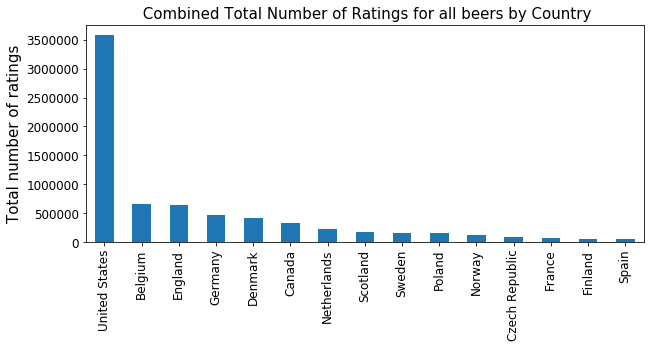

In [15]:
plt.figure(figsize=(10,4))
df_toprated.TotalRatingCount.sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Total number of ratings', size=15)
plt.title(' Combined Total Number of Ratings for all beers by Country', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

The United States has over 3.5 million ratings for all beers combined and Belgium has a little over 650,000. However, these countries have approximately the same percentage beers with ratings greater than 3.5. Again, we will have to consider the fact that the data was obtained from a US based website and consequently leads to more ratings. To avoid this bias, we may need to analyze beers only from the US since there is enough data.

Let's see how the mean alcohol content for all beers varies across the countries. 

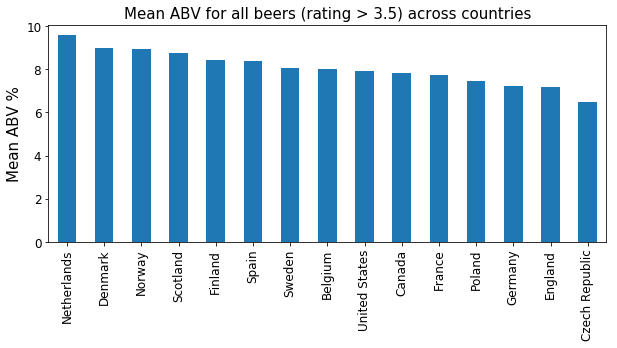

In [16]:
plt.figure(figsize=(10,4))
top_15[top_15.AverageRating > 3.5].groupby('Country').ABV.mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Mean ABV %', size=15)
plt.xlabel('')
plt.title('Mean ABV for all beers (rating > 3.5) across countries', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()
plt.show()

There is no significant difference among the ABV for the top rated beers across countries. Maybe the ABV is not that important for the ratings. We will take an in-depth look later. 

In [17]:
df_Belgium = df1[df1.Country == 'Belgium']
df_England = df1[df1.Country == 'England']
df_Canada = df1[df1.Country == 'Canada']
df_Germany = df1[df1.Country == 'Germany']
df_Denmark = df1[df1.Country == 'Denmark']
df_Netherlands = df1[df1.Country == 'Netherlands']
df_Sweden = df1[df1.Country == 'Sweden']
df_Poland = df1[df1.Country == 'Poland']
df_Norway = df1[df1.Country == 'Norway']

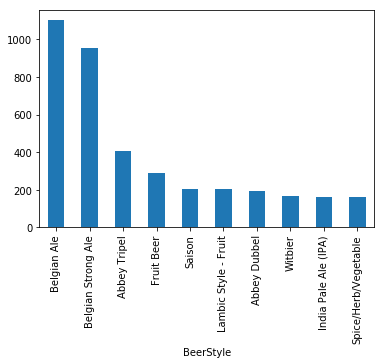

In [18]:
df_Belgium.groupby('BeerStyle').BeerStyle.count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

In [19]:
df_Belgium_BelgianAle = df_Belgium[df_Belgium.BeerStyle == 'Belgian Ale']

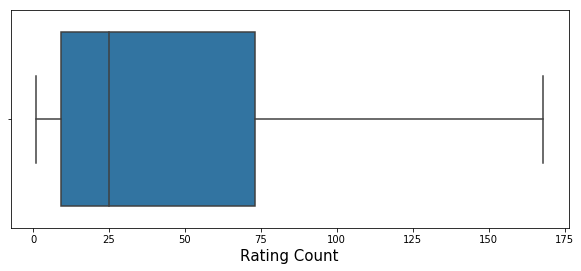

In [20]:
plt.figure(figsize=(10,4))
sns.boxplot(df_Belgium_BelgianAle.RatingCount,orient='h',showfliers=False)
plt.xlabel('Rating Count',size=15)
plt.show()

In [21]:
#Belgian Ales with rating counts below 175
df_Belgium_BelgianAle_noouts = df_Belgium_BelgianAle[df_Belgium_BelgianAle.RatingCount < 175]

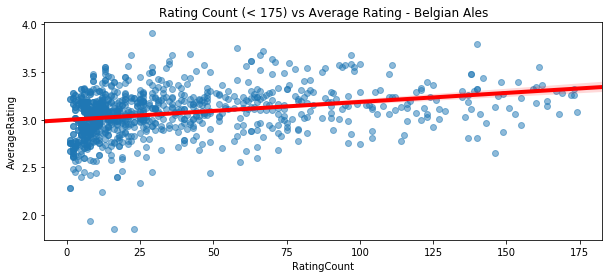

In [22]:
plt.figure(figsize=(10,4))
sns.regplot(df_Belgium_BelgianAle_noouts.RatingCount, df_Belgium_BelgianAle_noouts.AverageRating,scatter_kws={"alpha":0.5},fit_reg=True,line_kws={"color":"r","alpha":1.0,"lw":4})
plt.title('Rating Count (< 175) vs Average Rating - Belgian Ales')
plt.show()

In [23]:
from scipy import stats
stats.spearmanr(df_Belgium_BelgianAle_noouts.RatingCount,df_Belgium_BelgianAle_noouts.AverageRating)

SpearmanrResult(correlation=0.34755992197006064, pvalue=4.0398845528031514e-29)

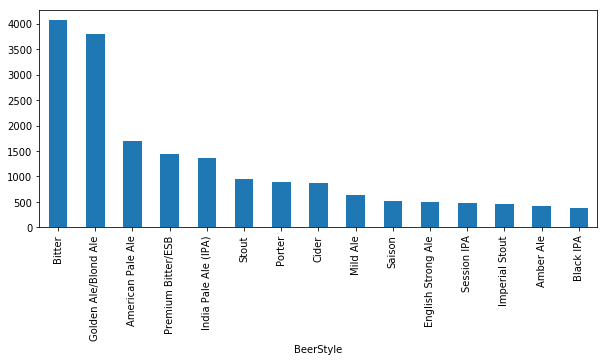

In [24]:
plt.figure(figsize=(10,4))
df_England.groupby('BeerStyle').BeerStyle.count().sort_values(ascending=False).head(15).plot(kind='bar')
plt.show()

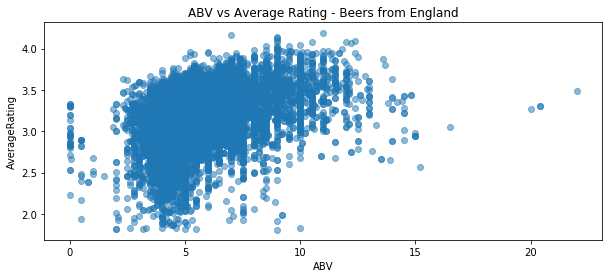

In [25]:
plt.figure(figsize=(10,4))
sns.regplot(df_England.ABV, df_England.AverageRating,scatter_kws={"alpha":0.5},fit_reg=False,line_kws={"color":"r","alpha":1.0,"lw":4})
plt.title('ABV vs Average Rating - Beers from England')
plt.show()

In [26]:
df_England.head(10)

,Name,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,City,State,Country,has_twitter,has_facebook
110,Old Chimneys Good King Henry Special Reserve,11.0,4.192935,442,Imperial Stout,Microbrewery,Diss,Suffolk,England,0,0
146,Shepherd Neame / Stone California Double IPA,7.0,4.163772,29,India Pale Ale (IPA),Commercial Brewery,Faversham,Kent,England,1,1
181,Cloudwater NW DIPA Citra,9.0,4.144886,126,Imperial IPA,Microbrewery,Manchester,Greater Manchester,England,1,1
235,Cloudwater DIPA - v13,9.0,4.122270,140,Imperial IPA,Microbrewery,Manchester,Greater Manchester,England,1,1
288,Cloudwater DIPA - v3,9.0,4.106705,108,Imperial IPA,Microbrewery,Manchester,Greater Manchester,England,1,1
325,Siren / Evil Twin Bourbon Barrel Even More Jes...,12.4,4.094162,61,Imperial Stout,Commercial Brewery,Finchampstead,Berkshire,England,1,0
368,Buxton / Omnipollo Yellow Belly Sundae,12.0,4.080291,261,Imperial Stout,Microbrewery,Buxton,Derbyshire,England,1,1
375,Cloudwater Birthday DIPA,9.0,4.078219,32,Imperial IPA,Microbrewery,Manchester,Greater Manchester,England,1,1
385,Magic Rock Bourbon Barrel Bearded Lady Dessert...,10.5,4.076355,119,Imperial Stout,Microbrewery,Huddersfield,West Yorkshire,England,0,1
441,Buxton Single Barrel Rain Shadow (Bourbon),12.2,4.064853,118,Imperial Stout,Microbrewery,Buxton,Derbyshire,England,1,1


## Beers from the United States

There are 88,228 beers from the US with 3.5 miilion combined reviews/ratings. We take a closer look at the data to see the state and city distribution.

In [27]:
#create dataframe with beers only from the US
df2 = df1[df1.Country == 'United States']

In [28]:
df2.head()

,Name,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,City,State,Country,has_twitter,has_facebook
2,Schramm’s The Heart of Darkness,14.0,4.423655,77,Mead,Meadery,Ferndale,Michigan,United States,1,1
3,B. Nektar Ken Schramm Signature Series - The H...,14.0,4.421873,50,Mead,Meadery,Ferndale,Michigan,United States,1,1
4,Cigar City Pilot Series Dragonfruit Passion Fr...,0.0,4.420719,46,Berliner Weisse,Microbrewery,Tampa,Florida,United States,1,1
6,Goose Island Bourbon County Stout - Rare 2010,13.0,4.410718,417,Imperial Stout,Commercial Brewery,Chicago,Illinois,United States,1,1
7,Toppling Goliath Mornin’ Delight,12.0,4.405847,186,Imperial Stout,Microbrewery,Decorah,Iowa,United States,1,1


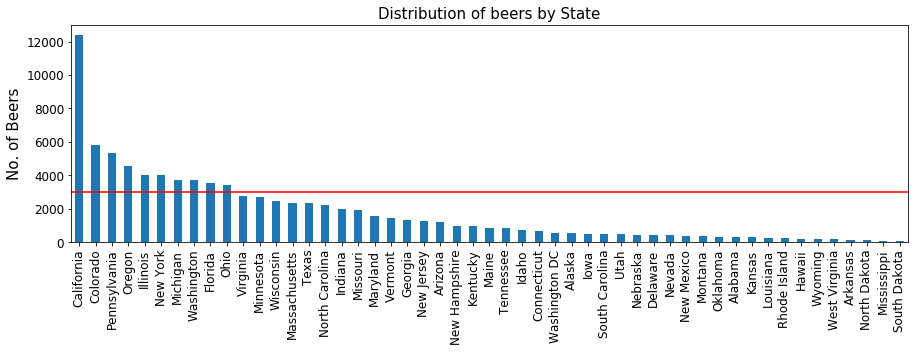

In [29]:
plt.figure(figsize=(15,4))
df2.groupby('State').State.count().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('No. of Beers', size=15)
plt.xlabel('')
plt.title('Distribution of beers by State', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.axhline(y=3000, color='r', linestyle='-')
plt.show()

California has the most number of beers, which is not very suprising. We will deep dive into the beers from California later.

Now lets compare statisitics for different variables for states with more than 3,000 beers.

In [30]:
#create a dataframe with top 10 states with most beers.
states_temp = dict(df2.groupby('State').State.count().sort_values(ascending=False).head(10))
states = list(states_temp.keys())
df_us_topstates = pd.DataFrame()
for state in states:
    df_us_topstates = df_us_topstates.append(df2[df2.State == state])
    


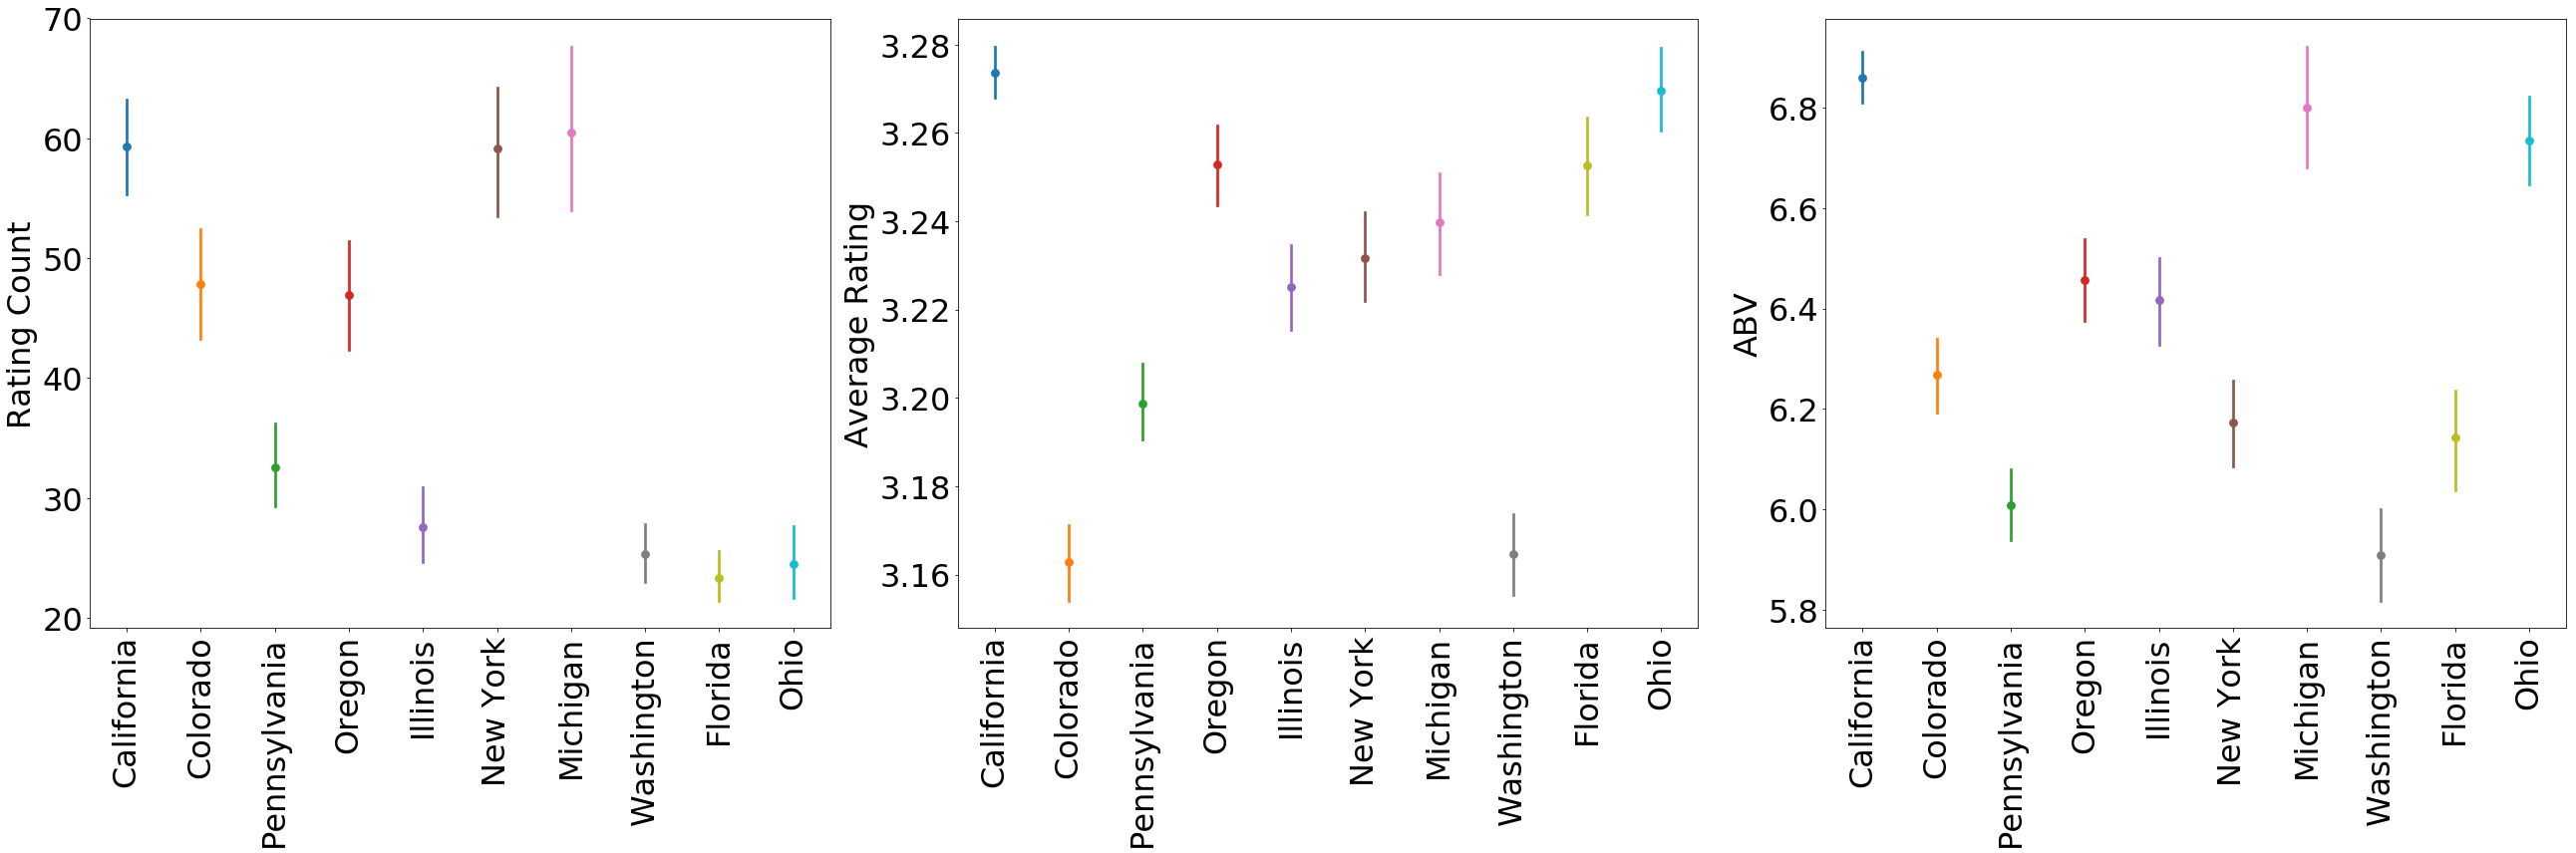

In [31]:
#box plot comapring rating count
plt.figure(figsize=(36,12))
plt.subplot(1,3,1)
temp = sns.pointplot(x='State',y='RatingCount',data=df_us_topstates,join=False,hue='State')
temp.set_xticklabels(temp.get_xticklabels(), rotation=90)
temp.legend_.remove()
plt.ylabel('Rating Count', size=32)
plt.xlabel('')
plt.xticks(size=32)
plt.yticks(size=32)

plt.subplot(1,3,2)
temp1 = sns.pointplot(x='State',y='AverageRating',data=df_us_topstates,join=False,hue='State')
temp1.set_xticklabels(temp.get_xticklabels(), rotation=90)
temp1.legend_.remove()
plt.ylabel('Average Rating', size=32)
plt.xlabel('')
plt.xticks(size=32)
plt.yticks(size=32)

plt.subplot(1,3,3)
temp2 = sns.pointplot(x='State',y='ABV',data=df_us_topstates,join=False,hue='State')
temp2.set_xticklabels(temp.get_xticklabels(), rotation=90)
temp2.legend_.remove()
plt.ylabel('ABV', size=32)
plt.xlabel('')
plt.xticks(size=32)
plt.yticks(size=32)

plt.tight_layout()
plt.show()

Beers from California and Michigan have a high mean ABV, average rating and rating count. However, looks like the parameters are not correlated for beers from other states. It is likely that the average rating depends on all the parameters combined.

### _Beers from California_

There were about 12,000 beers from California alone and will take a closer look at those.

In [32]:
#create a dataframe with beers from California 
df_ca = df2[df2.State == 'California']

In [33]:
df_ca.City.nunique()

233

The dataset contains has beers from 233 cities within California. Let's check for missing values.

In [34]:
df_ca.City.isnull().sum()

0

Looks like there are no missing cities in the dataframe. Now, we will plot the top 10 cities with the most number of beers. 

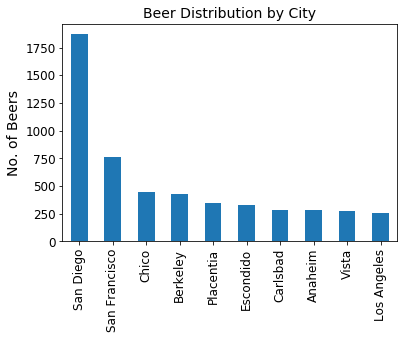

In [35]:
df_ca.groupby('City').City.count().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('')
plt.ylabel('No. of Beers',size=14)
plt.title('Beer Distribution by City',size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

The bay area has the maximum number of beers, with San Diego having a signifcant number compared to other cities. It is interesting to see that LA has only bout 300 beers. 

## Explore Variables

In the previous sections we looked at how the ratings vary across the different countries and states within the United States. We also looked at beers only from California and varations across the city. At a first glance it looks like there is no strong relationship between the different variables to draw any conclusions. 

We will continue to explore the variables independently and the relationhsip with each other. As mentioned earlier, the Average Rating is the target variable.

### Alcohol by Volume (ABV)

First we look at the Alcohol by Volume in the dataset. Earlier, we saw the mean ABV variation across the countries and states within the US was not significantly different.

In [36]:
print(df1.ABV.describe())

count    220000.000000
mean          5.914893
std           2.597578
min           0.000000
25%           4.700000
50%           5.500000
75%           7.000000
max          73.000000
Name: ABV, dtype: float64


During the data cleaning process we found that there were zero values in the ABV column. We assumed that these were not missing values. We will now take a closer look at these.

In [37]:
len(df1[df1.ABV == 0])

12354

There are about 12,354 beers with zero ABV.Inetersting! 

In [38]:
df1[df1.ABV == 0].head(10)

,Name,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,City,State,Country,has_twitter,has_facebook
4,Cigar City Pilot Series Dragonfruit Passion Fr...,0.0,4.420719,46,Berliner Weisse,Microbrewery,Tampa,Florida,United States,1,1
35,Cycle / 3 Sons Rare Scooop,0.0,4.292344,25,Imperial Stout,Microbrewery,Saint Petersburg,Florida,United States,0,1
37,Hill Farmstead / Blaugies Le Sarrasin,0.0,4.285634,116,Saison,Microbrewery,Greensboro,Vermont,United States,1,1
72,Voodoo ManBearPig,0.0,4.233223,50,Imperial Stout,Microbrewery,Meadville,Pennsylvania,United States,1,1
84,Hill Farmstead Aaron,0.0,4.212429,105,Barley Wine,Microbrewery,Greensboro,Vermont,United States,1,1
87,Cycle Trademark Dispute (Yellow),0.0,4.211616,104,Imperial Stout,Microbrewery,Saint Petersburg,Florida,United States,0,1
116,Cycle Trademark Dispute (Green),0.0,4.186147,72,Imperial Stout,Microbrewery,Saint Petersburg,Florida,United States,0,1
190,Hill Farmstead Damon - Port and Bourbon Barrel...,0.0,4.141681,64,Imperial Stout,Microbrewery,Greensboro,Vermont,United States,1,1
193,Hill Farmstead Sue,0.0,4.140529,98,Sour/Wild Ale,Microbrewery,Greensboro,Vermont,United States,1,1
214,De Garde The Peach,0.0,4.128307,43,Sour/Wild Ale,Microbrewery,Tillamook,Oregon,United States,0,1


It definitelty looks like the zero values are missing values. Highly rated imperial stouts cannot have a zero ABV! We will check if we need to fill these missing values. First we will look at the distribution of the ABV.

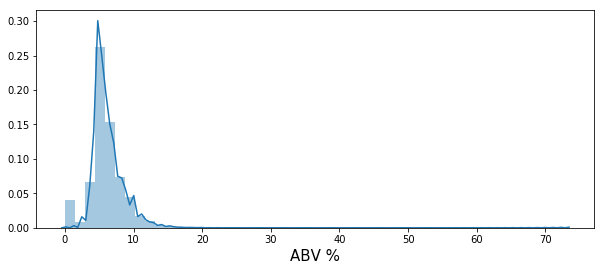

In [39]:
plt.figure(figsize=(10,4))
sns.distplot(df1.ABV)
plt.xlabel('ABV %',size=15)
plt.show()

The ABV % has a significant kurtosis as evidenced by the sharp peak. And there is a very long tail. A box plot may give a better idea on the outliers and other statistics.

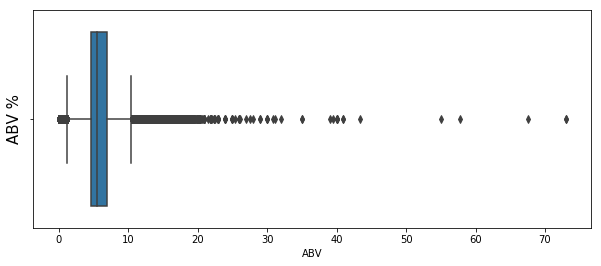

In [40]:
plt.figure(figsize=(10,4))
sns.boxplot(df1.ABV,orient='h')
plt.ylabel('ABV %',size=15)
plt.show()

The box plot shows a very narrow band between the first and third quartile. The maximum vaue is around 1% and and the minimum value is around 0%. We will calculate how many beers are there between the minimum and maximum,

In [41]:
len(df1[(df1.ABV) > 1 & (df1.ABV < 11)])

207056

We have 207,056 (94%) beers between the min and maximum value. That is quite a bit! However, we will have to fix the zero values to avoid errors in analysis. The method adopted here to fill the zero values is based on beer style. We will use the mean values for each style.

In [42]:
#build a dictionary for the beer styles and their corresponding means
style_mean = dict(df1.groupby('BeerStyle').ABV.mean())

#loop through the dataframe to fill the zero values with means
for i in range(len(df1)):
    if df1.iloc[i].ABV == 0:
        for k,v in style_mean.items():
            if df1.iloc[i,4] == k:
                df1.loc[i,'ABV'] = v

We will do an other check for zero values in the ABV column in the dataframe.

In [43]:
len(df1[df1.ABV == 0])

0

The zero values are filled. We will now plot the distrbution without the outliers i.e plot values only between 1 % and 11 % ABV.

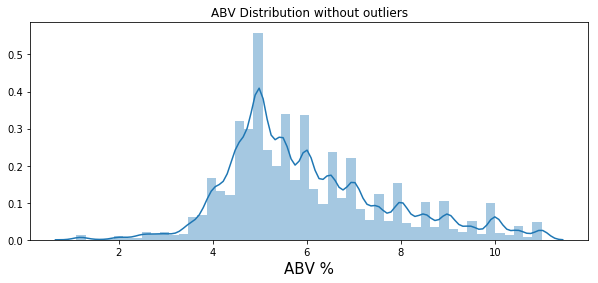

In [44]:
plt.figure(figsize=(10,4))
sns.distplot(df1[(df1.ABV > 1) & (df1.ABV <= 11)].ABV)
plt.xlabel('ABV %',size=15)
plt.title('ABV Distribution without outliers')
plt.show()

The ABV without the outliers is not normally distributed. We will look at the relationship between the ABV and Average Rating.

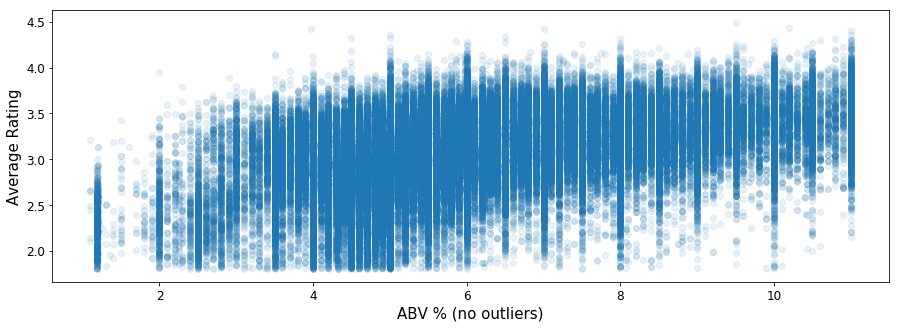

In [45]:
plt.figure(figsize=(15,5))
sns.regplot(df1[(df1.ABV > 1) & (df1.ABV <= 11)].ABV, df1[(df1.ABV > 1) & (df1.ABV <= 11)].AverageRating, scatter_kws={"alpha":0.1},fit_reg=False,line_kws={"color":"r","alpha":1.0,"lw":4})
plt.xlabel('ABV % (no outliers)', size=15)
plt.ylabel('Average Rating', size=15)
#plt.title('ABV % (no outliers) vs Average Rating', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

The Average Rating does not seem to have any relationship with the ABV. Since the ABV is not normally distributed we can apply a null hypthesis test using a spearmans corrrelation.

In [46]:
from scipy import stats
stats.spearmanr(df1[(df1.ABV > 1) & (df1.ABV <= 11)].ABV, df1[(df1.ABV > 1) & (df1.ABV <= 11)].AverageRating)

SpearmanrResult(correlation=0.4436997386155796, pvalue=0.0)

There is a weak positive correlation between the average rating and ABV that is statistically significant. It is likely that the average rating depends on the ABV combined with the other factors. We will check if there is a correlation between the  ABV and Average rating for beers from United States and just from California. Sice we did a little cleaning of the data earlier we will reset the dataframes accordingly.

In [47]:
df_us = df1[df1.Country == 'United States']
df_ca = df_us[df_us.State == 'California']

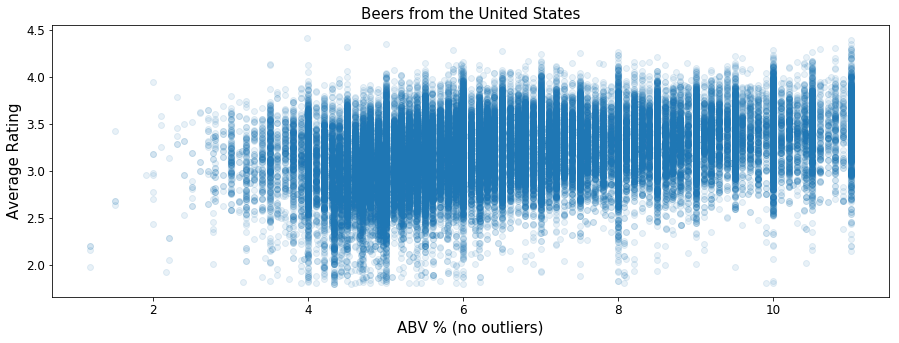

In [48]:
plt.figure(figsize=(15,5))
sns.regplot(df_us[(df_us.ABV > 1) & (df_us.ABV <= 11)].ABV, df_us[(df_us.ABV > 1) & (df_us.ABV <= 11)].AverageRating, scatter_kws={"alpha":0.1},fit_reg=False,line_kws={"color":"r","alpha":1.0,"lw":4})
plt.xlabel('ABV % (no outliers)', size=15)
plt.ylabel('Average Rating', size=15)
plt.title('Beers from the United States', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

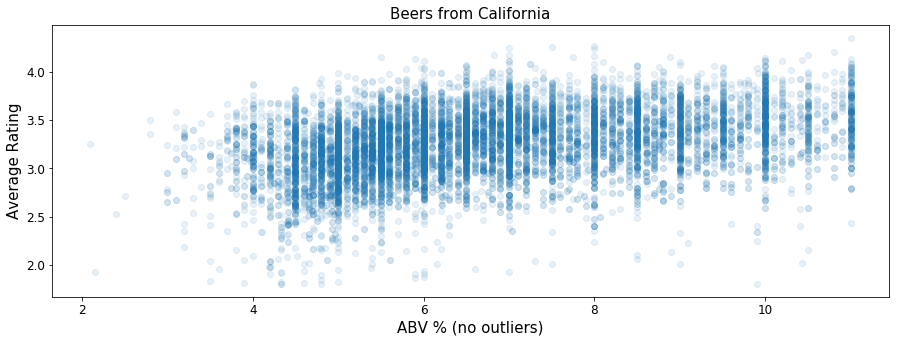

In [49]:
plt.figure(figsize=(15,5))
sns.regplot(df_ca[(df_ca.ABV > 1) & (df_ca.ABV <= 11)].ABV, df_ca[(df_ca.ABV > 1) & (df_ca.ABV <= 11)].AverageRating, scatter_kws={"alpha":0.1},fit_reg=False,line_kws={"color":"r","alpha":1.0,"lw":4})
plt.xlabel('ABV % (no outliers)', size=15)
plt.ylabel('Average Rating', size=15)
plt.title('Beers from California', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

In [50]:
stats.spearmanr(df_us[(df_us.ABV > 1) & (df_us.ABV <= 11)].ABV, df_us[(df_us.ABV > 1) & (df_us.ABV <= 11)].AverageRating)

SpearmanrResult(correlation=0.36930216608373234, pvalue=0.0)

In [51]:
stats.spearmanr(df_ca[(df_ca.ABV > 1) & (df_ca.ABV <= 11)].ABV, df_ca[(df_ca.ABV > 1) & (df_ca.ABV <= 11)].AverageRating)

SpearmanrResult(correlation=0.37443331890242598, pvalue=0.0)

There is no strong trend between the average rating and ABV for beers wihtin the United States and locally in California. 

### Rating Count 

We will now take a look at how the rating count for each beer affects the average rating. The question we would like to answer is if more people are rating the beer (i.e. drinking the beer), does it lead to better ratings. This will be important for breweries to understand for marketing strategies, especially investing in tools such as social media to get the word out there.

In [52]:
print(df1.RatingCount.describe())

count    220000.000000
mean         35.734341
std         127.098904
min           0.000000
25%           5.000000
50%          10.000000
75%          25.000000
max        5182.000000
Name: RatingCount, dtype: float64


We have a minimum of 0 rating count, which is suspect. A beer cannot have an average rating without anyone rating it. 

In [53]:
len(df1[df1.RatingCount == 0])

33

Since there are only 33 zero values in the rating count, we will replace these with the mean values.

In [54]:
df1.RatingCount = np.where(df1.RatingCount == 0, 35.73,df1.RatingCount)

In [55]:
len(df1[df1.RatingCount == 0])

0

The zero values in the rating count column have been replaced with the mean values. Now, let's look at the distribution.

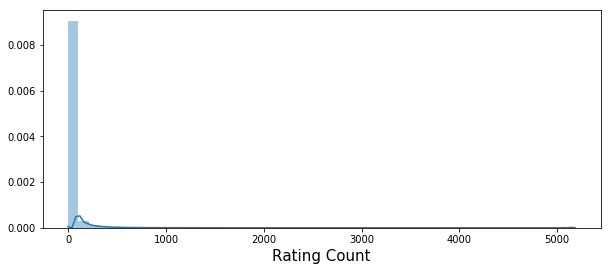

In [56]:
plt.figure(figsize=(10,4))
sns.distplot(df1.RatingCount)
plt.xlabel('Rating Count',size=15)
#plt.title('ABV Distribution without outliers')
sns.color_palette()
plt.show()

The distribution is extremely skewed with a long tail. A boxplot will provide more insights on the outliers.

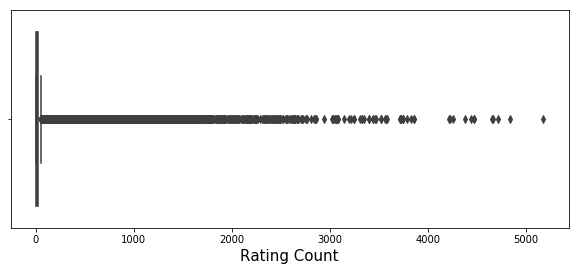

In [57]:
plt.figure(figsize=(10,4))
sns.boxplot(df1.RatingCount)
plt.xlabel('Rating Count',size=15)
#plt.title('ABV Distribution without outliers')
sns.color_palette()
plt.show()

There are lot of outliers in the dataset. We will calculate the number of beers with rating count above 2 standard deviations (i.e 254).

In [58]:
len(df1[df1.RatingCount > 254])

4855

There are 4,855 beers with more than 254 reviews/ratings, approximately 2%. We will plot the distribution for beers with rating count less than 254. 

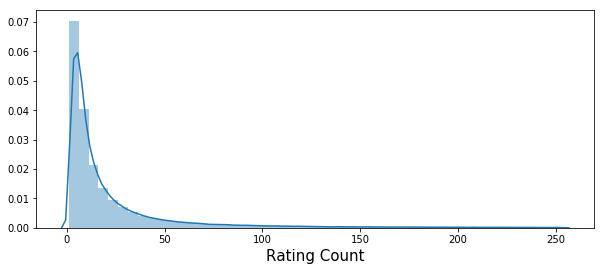

In [59]:
plt.figure(figsize=(10,4))
sns.distplot(df1[df1.RatingCount < 254].RatingCount)
plt.xlabel('Rating Count',size=15)
#plt.title('ABV Distribution without outliers')
plt.show()

The rating count data has a really high standard deviation and the coefficient of varaiation is extremely high. We will take a look at the rating count distribution for beers only from United States and california

In [60]:
df_us.RatingCount.describe()

count    88228.000000
mean        40.621016
std        148.212635
min          0.000000
25%          4.000000
50%          9.000000
75%         22.000000
max       4664.000000
Name: RatingCount, dtype: float64

In [61]:
df_ca.RatingCount.describe()

count    12387.000000
mean        59.299830
std        215.949264
min          0.000000
25%          5.000000
50%         10.000000
75%         28.000000
max       4664.000000
Name: RatingCount, dtype: float64

In [62]:
top_15.groupby('Country').RatingCount.describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Belgium,5492.0,119.168245,322.475191,1.0,10.0,26.0,85.0,4837.0
Canada,14225.0,22.912970,76.328976,0.0,5.0,9.0,20.0,3052.0
Czech Republic,2928.0,27.984973,102.917767,1.0,5.0,9.0,21.0,3865.0
Denmark,9644.0,43.065429,83.297459,1.0,9.0,20.0,43.0,2448.0
England,23402.0,27.251816,90.698221,0.0,5.0,11.0,23.0,3794.0
Finland,3136.0,19.568878,34.006750,1.0,6.0,11.0,22.0,1277.0
France,3183.0,23.857681,61.162257,1.0,5.0,10.0,22.0,1703.0
Germany,13129.0,36.142585,132.090619,1.0,6.0,13.0,28.0,3716.0
Netherlands,5879.0,37.622555,102.210954,1.0,7.0,14.0,35.0,3519.0


There are extremely large variations in the dataset for rating count across all countries, and also within the United States and California. This is something to keep in mind for further analysis. We will take a look at the relationship between the rating count (less than 200, approximately 2 standard deviations from the mean) and the average rating.

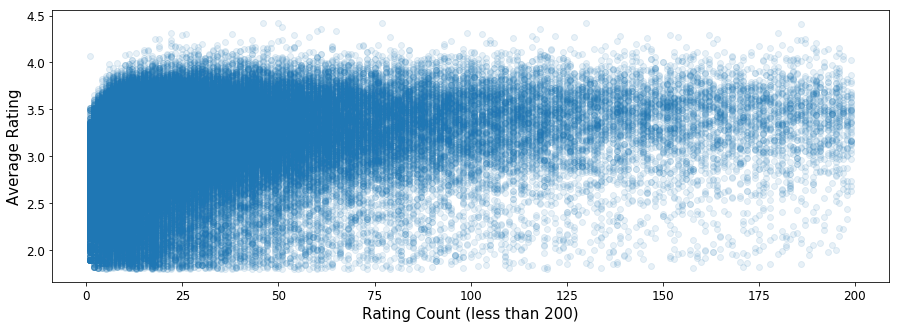

In [63]:
plt.figure(figsize=(15,5))
sns.regplot(df1[df1.RatingCount < 200].RatingCount, df1[df1.RatingCount < 200].AverageRating, scatter_kws={"alpha":0.1},fit_reg=False,line_kws={"color":"r","alpha":1.0,"lw":4})
plt.xlabel('Rating Count (less than 200)', size=15)
plt.ylabel('Average Rating', size=15)
#plt.title('Beers from California', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

In [64]:
stats.spearmanr(df1[df1.RatingCount < 200].RatingCount, df1[df1.RatingCount < 200].AverageRating)

SpearmanrResult(correlation=0.3453989141842298, pvalue=0.0)

There is no clear trend in the rating count vs Average rating for beers from all countries. There is a weak positive correlation with a spearman rho of 0.35 that is statisitcally signifcant. From the analysis so far, it is evident that the average rating is not dependent on the rating count and ABV independently. We will look at the combined effects later.

### Social Media

The dataset contains two binary columns that 'has_facebook' and 'has_twitter' that were created during the data cleaning process which indicates the social media account availability for each beer. We will create one more column called 'SocailMedia' that indicates availabilty of either social media, which will be useful for analysis.

Total number of beers with either social media account: 162223
Total number of beers with Twitter: 109853
Total number of beers with Facebook: 159920


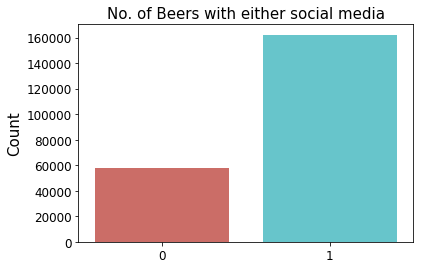

In [65]:
df1['SocialMedia'] = np.where((df1.has_twitter ==1 ) | (df1.has_facebook == 1), 1, 0)
#df_social['BothSocialMedia'] = np.where((df_social['has_twitter']==1) & (df_social['has_facebook'] == 1), 1, 0)
print ('Total number of beers with either social media account:',df1.SocialMedia.sum())
print ('Total number of beers with Twitter:',df1.has_twitter.sum())
print ('Total number of beers with Facebook:',df1.has_facebook.sum())
#print ('Total number of beers with both social media accounts:',df_social.BothSocialMedia.sum())

sns.countplot(x='SocialMedia',data=df1,palette='hls')
plt.title('No. of Beers with either social media',size=15)
plt.ylabel('Count',size=15)
plt.xlabel('')
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

About 74% of the beers have social media accounts. Looks like the breweries are already getting the word out there! Although, more number of breweries prefer a Facebook account to a twitter account. Quite a few of them have both. 

Lets take a quick look at the top 5 beers. Interestingly the top two beers have neither social media accounts and one of them has 3,332 total ratings. A search on the internet did indicate that the top two beers do not have social media accounts indeed! In fact, the second ranked ber (Westvleteren) is brewed at a monastery in Belgium and is only available there. This speciality of the beer in itself may have resulted in more people trying the beer, thereby resulting in a high rating count. For the purpose of this analysis, this particular beer can be considered an outlier. The other 3 beers in the top 5 have both social media accounts.

In [66]:
df1.head(5)

,Name,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,City,State,Country,has_twitter,has_facebook,SocialMedia
0,Närke Kaggen Stormaktsporter,9.500000,4.489771,557.0,Imperial Stout,Microbrewery,Örebro,NaN,Sweden,0,0,0
1,Westvleteren 12 (XII),10.200000,4.426578,3332.0,Abt/Quadrupel,Microbrewery,Westvleteren,NaN,Belgium,0,0,0
2,Schramm’s The Heart of Darkness,14.000000,4.423655,77.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
3,B. Nektar Ken Schramm Signature Series - The H...,14.000000,4.421873,50.0,Mead,Meadery,Ferndale,Michigan,United States,1,1,1
4,Cigar City Pilot Series Dragonfruit Passion Fr...,3.979168,4.420719,46.0,Berliner Weisse,Microbrewery,Tampa,Florida,United States,1,1,1


Let's get a better sense of the average rating and counts across the two classes.

In [67]:
df1.groupby('SocialMedia').mean()

,ABV,AverageRating,RatingCount,has_twitter,has_facebook
SocialMedia,,,,,
0,5.683783,2.876308,34.201850,0.000000,0.000000
1,6.419630,3.166773,36.287418,0.677173,0.985803


Then average rating and rating count are slightly higher for the beers with a social media account.

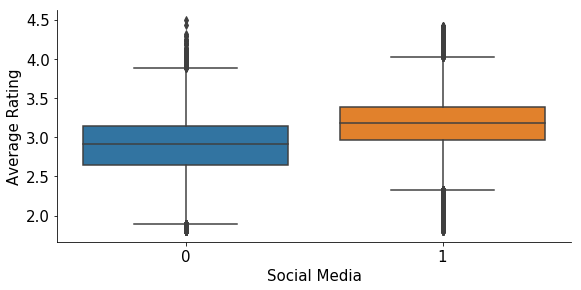

In [68]:
g = sns.factorplot(x='SocialMedia', y='AverageRating',data=df1, kind='box', size=4, aspect=2)
plt.ylabel('Average Rating',size=15)
plt.xlabel('Social Media',size=15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [69]:
stats.pointbiserialr(df1.SocialMedia,df1.RatingCount)

PointbiserialrResult(correlation=0.0072209953922952094, pvalue=0.00070668608261733104)

In [70]:
stats.pointbiserialr(df1.SocialMedia,df1.AverageRating)

PointbiserialrResult(correlation=0.34282442072847608, pvalue=0.0)

The pointbiserialr correlation coefficent is close to 0 for rating Count and social media, which indicates no correlation that is statistically significant. In comparison, the social media and average rating have a weak correlation that is statistically significant.

### Beer Style

Beer style can be an other parameter that influences the the average ratings. There are 94 different beer styles in the dataset that will be explored in this section. There are sub-styles within a primary style such as Lambic Style (Faro), Lambic Style (Unblended) and so on. Since the reviewers score on parameters like taste and aroma, the sub-styles have not been combined for analysis

First we will explore the top 10 beerstyles by the number of beers.

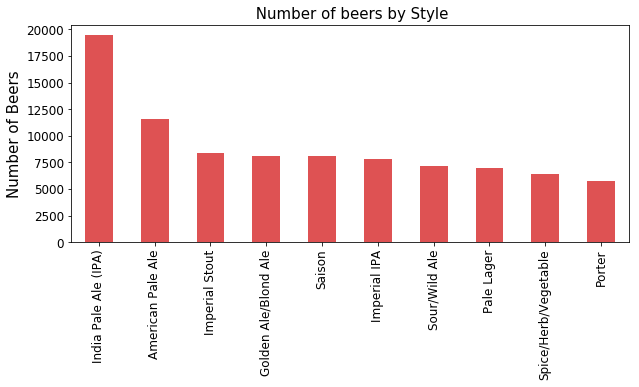

In [71]:
plt.figure(figsize=(10,4))
df1.groupby('BeerStyle').BeerStyle.count().sort_values(ascending=False).head(10).plot(kind='bar',color='#d62728',alpha=0.8)
plt.ylabel('Number of Beers', size=15)
plt.title(' Number of beers by Style', size=15)
plt.xlabel('')
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

The Pale Ale's dominate the list followed by the Imperial Stout. We compare the average rating for the top 10 styles.

In [72]:
#create a dataframe for the top 15 beer styles
styles_top = df1.groupby('BeerStyle').BeerStyle.count().sort_values(ascending=False).head(10)
styles = list(styles_top.keys())
top_styles = pd.DataFrame()
for s in styles:
    top_styles = top_styles.append(df1[df1.BeerStyle == s])


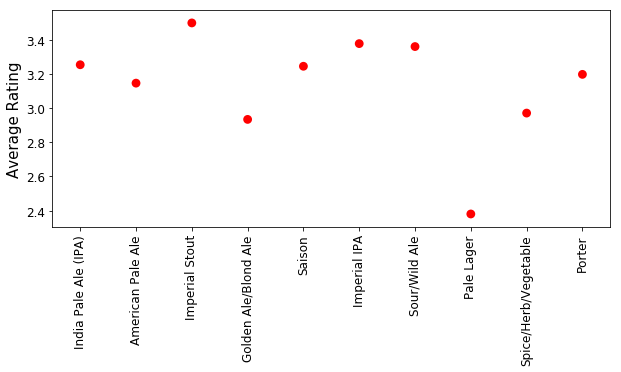

In [73]:
plt.figure(figsize=(10,4))
temp3 = sns.pointplot(x='BeerStyle',y='AverageRating',data=top_styles,join=False,color='red')
temp3.set_xticklabels(temp3.get_xticklabels(), rotation=90)
plt.xticks(size=12)
plt.yticks(size=12)
plt.xlabel('')
plt.ylabel('Average Rating',size=15)
plt.show()

The Imperial stouts have the best average rating and pale lager have the worst mean average rating. We will compare these two styles in detail.

In [74]:
df_imp_pale = top_styles[(top_styles.BeerStyle == 'Imperial Stout') | (top_styles.BeerStyle == 'Pale Lager')]

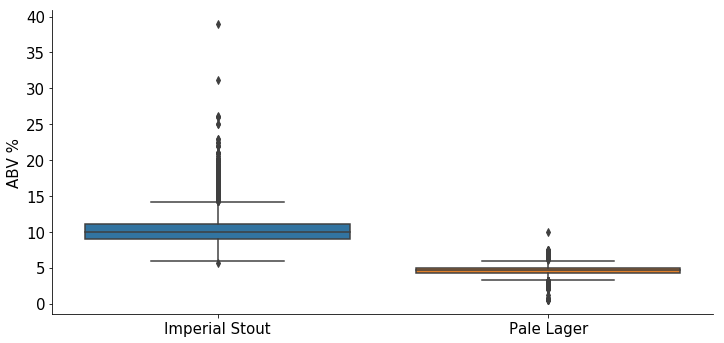

In [75]:
sns.factorplot(x='BeerStyle',y='ABV',data=df_imp_pale,kind='box',size=5,aspect=2)
plt.ylabel('ABV %',size=15)
plt.xlabel('')
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

The imperial stouts have an ABV twice that of the Pale Lagers and some of them have an ABV % as high as 40%. Between two styles there is a correlation between ABV and Abverage rating count between these teo styles. We will take a look at the rating counts also.

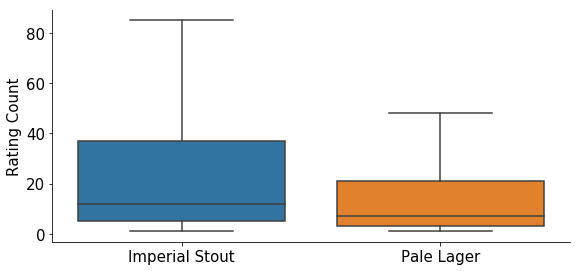

In [76]:
sns.factorplot(x='BeerStyle',y='RatingCount',data=df_imp_pale,kind='box',size=4,aspect=2,showfliers=False)
plt.ylabel('Rating Count',size=15)
plt.xlabel('')
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

The mean counts are approximately the same for the two styles, though the total number of counts are larger for the Imperial stouts. So in summary, the average rating for the imperial stouts is higher and they have a higher mean ABV% and approximately the same mean rating count as the pale lagers. We will see if there is a correlation between the ABV and average rating count for each style.

In [77]:
#create data frames for the imperial stouts and pale lager
df_imp = top_styles[top_styles.BeerStyle == "Imperial Stout"]
df_pale = top_styles[top_styles.BeerStyle == "Pale Lager"]

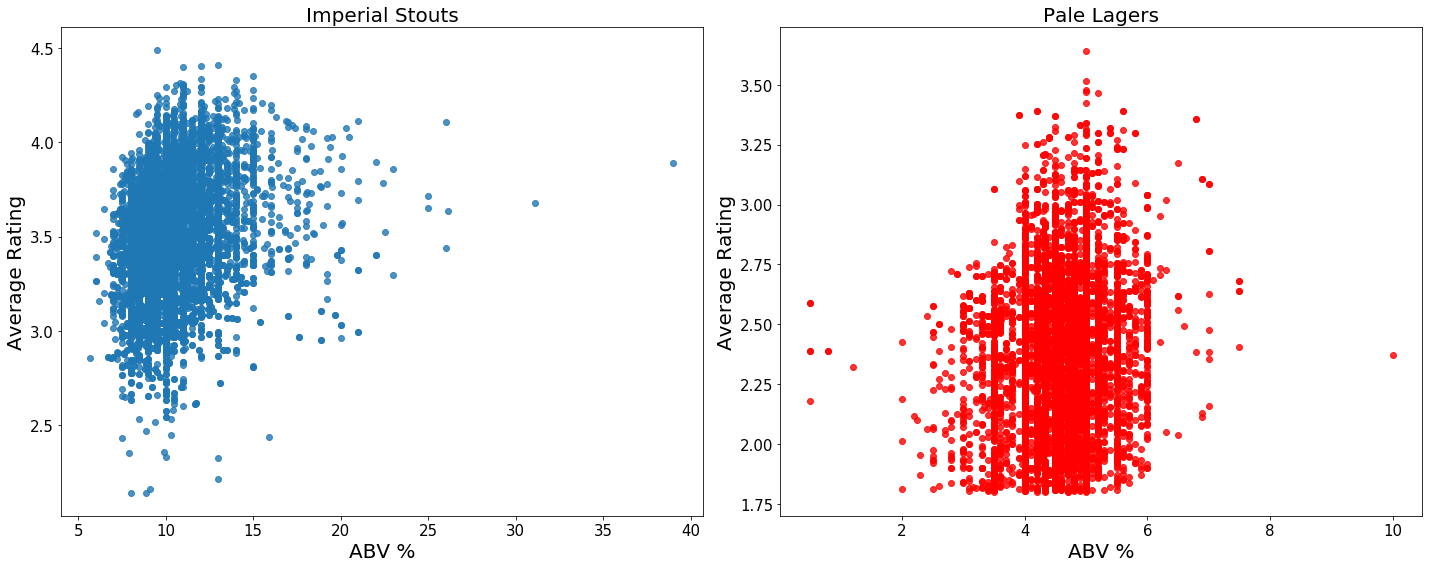

In [78]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.regplot(df_imp.ABV,df_imp.AverageRating,fit_reg=False)
plt.xlabel('ABV %', size=20)
plt.ylabel('Average Rating', size=20)
plt.title('Imperial Stouts',size=20)
plt.xticks(size=15)
plt.yticks(size=15)

plt.subplot(1,2,2)
sns.regplot(df_pale.ABV,df_pale.AverageRating,fit_reg=False,color='r')
plt.xlabel('ABV %', size=20)
plt.ylabel('Average Rating', size=20)
plt.title('Pale Lagers',size=20)
plt.xticks(size=15)
plt.yticks(size=15)


plt.tight_layout()
plt.show()

In [79]:
stats.spearmanr(df_imp.ABV,df_imp.AverageRating),stats.spearmanr(df_pale.ABV,df_pale.AverageRating)

(SpearmanrResult(correlation=0.27239276445899507, pvalue=3.3751240426361345e-143),
 SpearmanrResult(correlation=0.092740295071165754, pvalue=7.7036624992599268e-15))

There is a very weak correlation between ABV and Average Rating within the styles. We will look at the beer styles more closely i.e within California.

In [117]:
df_ca.head(10)

,Name,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,City,State,Country,has_twitter,has_facebook
13,Russian River Pliny the Younger,11.0,4.352355,716,Imperial IPA,Brew Pub/Brewery,Santa Rosa,California,United States,0,1
15,AleSmith Speedway Stout - Bourbon Barrel Aged,12.0,4.334422,844,Imperial Stout,Microbrewery,San Diego,California,United States,1,1
31,AleSmith Speedway Stout,12.0,4.294614,2857,Imperial Stout,Microbrewery,San Diego,California,United States,1,1
32,AleSmith Speedway Stout - Bourbon Barrel Aged:...,12.0,4.294449,162,Imperial Stout,Microbrewery,San Diego,California,United States,1,1
46,Russian River Pliny the Elder,8.0,4.270540,2644,Imperial IPA,Brew Pub/Brewery,Santa Rosa,California,United States,0,1
47,AleSmith Speedway Stout - Bourbon Barrel Aged:...,12.0,4.268818,215,Imperial Stout,Microbrewery,San Diego,California,United States,1,1
51,Lost Abbey Yellow Bus,7.5,4.260769,111,Sour/Wild Ale,Microbrewery,San Marcos,California,United States,1,1
60,Lost Abbey Isabelle Proximus,7.0,4.249825,484,Lambic Style - Gueuze,Microbrewery,San Marcos,California,United States,1,1
65,Lost Abbey Veritas 004,8.0,4.240545,186,Sour/Wild Ale,Microbrewery,San Marcos,California,United States,1,1
83,Firestone Walker Parabola,14.0,4.214336,1101,Imperial Stout,Commercial Brewery,Paso Robles,California,United States,1,1


In [118]:
#create a subset for beers from California with the top 10 styles
ca_substyles = dict(df_ca.groupby('BeerStyle').BeerStyle.count().sort_values(ascending=False).head(10))
substyles = list(ca_substyles.keys())
df_ca_subset = pd.DataFrame()
for style in substyles:
    df_ca_subset = df_ca_subset.append(df_ca[df_ca.BeerStyle == style])

In [119]:
df_ca_subset.head(10)

,Name,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,City,State,Country,has_twitter,has_facebook
387,AleSmith IPA,7.25,4.076152,2373,India Pale Ale (IPA),Microbrewery,San Diego,California,United States,1,1
719,Ballast Point Sculpin IPA,7.00,4.016998,2648,India Pale Ale (IPA),Microbrewery,San Diego,California,United States,1,1
763,Alpine Beer Company Nelson IPA,7.00,4.010216,735,India Pale Ale (IPA),Microbrewery,Alpine,California,United States,0,1
903,Moonraker Yojo,6.90,3.991631,25,India Pale Ale (IPA),Microbrewery,Auburn,California,United States,1,1
919,Russian River Blind Pig IPA,6.10,3.989258,1412,India Pale Ale (IPA),Brew Pub/Brewery,Santa Rosa,California,United States,0,1
1272,Stone IPA (India Pale Ale),6.90,3.946640,3865,India Pale Ale (IPA),Commercial Brewery,Escondido,California,United States,1,1
1327,Sante Adairius Simpleton,6.40,3.942067,62,India Pale Ale (IPA),Microbrewery,Capitola,California,United States,1,1
1365,Russian River Hopfather,6.81,3.938943,59,India Pale Ale (IPA),Brew Pub/Brewery,Santa Rosa,California,United States,0,1
1724,Alpine Beer Company Duet,7.00,3.909986,930,India Pale Ale (IPA),Microbrewery,Alpine,California,United States,0,1
1834,Modern Times / Great Notion Effective Dreams,7.20,3.902598,21,India Pale Ale (IPA),Microbrewery,San Diego,California,United States,1,1


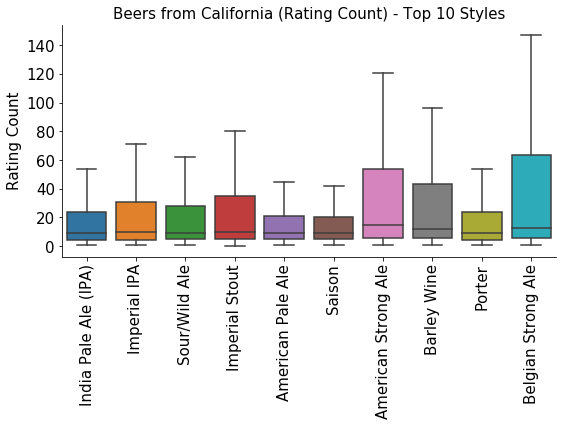

In [125]:
g=sns.factorplot(x='BeerStyle',y='RatingCount',data=df_ca_subset,kind='box',size=4,aspect=2,showfliers=False)
g.set_xticklabels(rotation=90)
plt.ylabel('Rating Count',size=15)
plt.title('Beers from California (Rating Count) - Top 10 Styles',size=15)
plt.xlabel('')
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

The mean rating counts are somewhat similar for all the beer styles. However, the total counts are higher for the Belgian strong and American strong ale. We will apply a regression analysis to check the influence of the beer styles on the rating count.

In [126]:
#create dummy variables for the styles
dummy_styles = pd.get_dummies(df_ca_subset.BeerStyle,prefix='style')

In [127]:
data_ca = df_ca_subset.join(dummy_styles)

In [139]:
data_ca.head(3)

,Name,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,City,State,Country,has_twitter,...,style_American Pale Ale,style_American Strong Ale,style_Barley Wine,style_Belgian Strong Ale,style_Imperial IPA,style_Imperial Stout,style_India Pale Ale (IPA),style_Porter,style_Saison,style_Sour/Wild Ale
387,AleSmith IPA,7.25,4.076152,2373,India Pale Ale (IPA),Microbrewery,San Diego,California,United States,1,...,0,0,0,0,0,0,1,0,0,0
719,Ballast Point Sculpin IPA,7.00,4.016998,2648,India Pale Ale (IPA),Microbrewery,San Diego,California,United States,1,...,0,0,0,0,0,0,1,0,0,0
763,Alpine Beer Company Nelson IPA,7.00,4.010216,735,India Pale Ale (IPA),Microbrewery,Alpine,California,United States,0,...,0,0,0,0,0,0,1,0,0,0


The beer styles (top 10) have been converted to a binary columns. 

In [146]:
#OLS model with ABV as the dependent variable and Beer Styles as predictors
cols1 = ['style_American Pale Ale','style_American Strong Ale','style_Barley Wine','style_Belgian Strong Ale','style_Imperial IPA','style_Imperial Stout','style_India Pale Ale (IPA)','style_Porter','style_Saison','style_Sour/Wild Ale']
X = data_ca[cols1]
y = data_ca.ABV

In [147]:
import statsmodels.api as sm
OLS_model=sm.OLS(y,X)
result=OLS_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    ABV   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     1427.
Date:                Tue, 30 Jan 2018   Prob (F-statistic):               0.00
Time:                        12:21:20   Log-Likelihood:                -11987.
No. Observations:                6972   AIC:                         2.399e+04
Df Residuals:                    6962   BIC:                         2.406e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
style_American Pale 

In [148]:
y1 = data_ca.RatingCount
OLS_model2=sm.OLS(y1,X)
result2=OLS_model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            RatingCount   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     6.550
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           2.35e-09
Time:                        12:31:35   Log-Likelihood:                -48366.
No. Observations:                6972   AIC:                         9.675e+04
Df Residuals:                    6962   BIC:                         9.682e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
style_American Pale 

The R-squared value for the OLS model with ABV as the predictor is 0.648, with all styles being statistically significant. However, the R-squared value is extremely low for the OLS model with Rating Count as the predictor variable. Since, ABV has a direct impact on the average rating as seen earlier, it can be said that the beer styles have an indirect impact. As long as we have the ABV, that is enough to predict the average rating for the beer. Though the analysis has been done only for beers from California, the same observations are expected for the entire data set.

### Brewery Type

We will look at the different brewery types in the dataset.

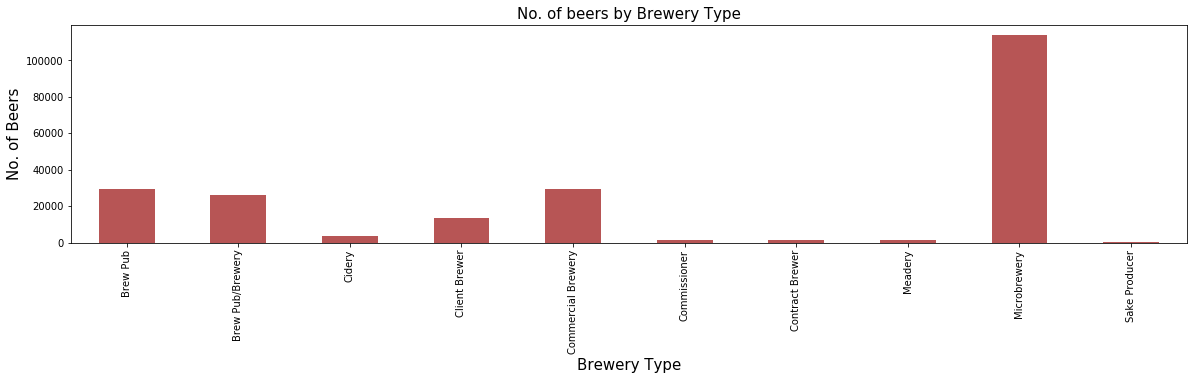

In [80]:
plt.figure(figsize=(20,4))
df1.groupby('BreweryType')['BreweryType'].count().plot(kind='bar',color='brown', alpha=0.8)
plt.xlabel('Brewery Type', size=15)
plt.ylabel('No. of Beers',size=15)
plt.title('No. of beers by Brewery Type', size=15)
plt.show()

In [81]:
df1.groupby('BreweryType')['BreweryType'].count()

BreweryType
Brew Pub               29412
Brew Pub/Brewery       25855
Cidery                  3567
Client Brewer          13233
Commercial Brewery     29624
Commissioner            1146
Contract Brewer         1562
Meadery                 1430
Microbrewery          113700
Sake Producer            471
Name: BreweryType, dtype: int64

More than 50% of the beers in the dataset are from Micro-breweries, which is interesting. Let's take it one step further and see how the microbrweries are distributed in the world. 

In [82]:
df_microbreweries = df1[df1['BreweryType'] == 'Microbrewery']

In [83]:
df_microbreweries.groupby('Country')['Country'].count().sort_values(ascending=False).head(15)

Country
United States    45673
England          16643
Canada            7996
Denmark           5033
Sweden            3951
Belgium           2871
Netherlands       2848
Norway            2353
Germany           2309
Scotland          2209
Spain             2014
France            1945
Finland           1899
Poland            1859
Italy             1699
Name: Country, dtype: int64

The United States has the most number of microbreweries. This is not suprising since there a lot of new savvy young people starting microbrewries in the US.

Lets explore the mircobreweries little further.

In [84]:
#create a dataframe for the microberweries
df_microbrew = df1[df1.BreweryType == 'Microbrewery']
df_microbrew.describe()

,ABV,AverageRating,RatingCount,has_twitter,has_facebook,SocialMedia
count,113700.000000,113700.000000,113700.000000,113700.000000,113700.000000,113700.000000
mean,6.299216,3.161642,34.287713,0.574125,0.806535,0.818663
std,2.121546,0.324720,118.770985,0.494477,0.395016,0.385299
min,0.010000,1.800558,1.000000,0.000000,0.000000,0.000000
25%,4.900000,2.956470,5.000000,0.000000,1.000000,1.000000
50%,5.800000,3.167415,10.000000,1.000000,1.000000,1.000000
75%,7.200000,3.380680,24.000000,1.000000,1.000000,1.000000
max,73.000000,4.489771,4718.000000,1.000000,1.000000,1.000000


The statistics are similar are not any different from the statistics for all the beers. This is not surprising since the half the dataset contains beers from the microbreweries. We will look at statisitcs for the rest of the brewery types.

In [85]:
#create a dataframe with all other brewery types except microbrewery
df_otherbrewtype = df1[df1.BreweryType != 'Microbrewery']
df_otherbrewtype.describe()

,ABV,AverageRating,RatingCount,has_twitter,has_facebook,SocialMedia
count,106300.000000,106300.000000,106300.000000,106300.000000,106300.000000,106300.000000
mean,6.148474,3.014385,37.292767,0.419332,0.641740,0.650433
std,2.286834,0.404625,135.422844,0.493452,0.479491,0.476836
min,0.010000,1.800000,1.000000,0.000000,0.000000,0.000000
25%,4.800000,2.781418,5.000000,0.000000,0.000000,0.000000
50%,5.500000,3.046984,10.000000,0.000000,1.000000,1.000000
75%,7.000000,3.289404,25.000000,1.000000,1.000000,1.000000
max,55.000000,4.423655,5182.000000,1.000000,1.000000,1.000000


The combined statistics are similar for all other brewery types when compared with the microbreweries. 

## Prediction Model

Based on the analysis in the previous sections it is clear that there is no one single parameter that controls the ratings for the beers. Variables such as beer style and social media have an effect on ABV and rating counts, consequently having an  indirect effect on the ratings. Modelling all these parameters together will lead to multicollinearity issues and over fitting. We will use only the ABV and Rating Count for further modeling. Also, since there is a large number of beers from the US, we will use only those for further analysis. 

In [149]:
df2.head()

,Name,ABV,AverageRating,RatingCount,BeerStyle,BreweryType,City,State,Country,has_twitter,has_facebook
2,Schramm’s The Heart of Darkness,14.0,4.423655,77,Mead,Meadery,Ferndale,Michigan,United States,1,1
3,B. Nektar Ken Schramm Signature Series - The H...,14.0,4.421873,50,Mead,Meadery,Ferndale,Michigan,United States,1,1
4,Cigar City Pilot Series Dragonfruit Passion Fr...,0.0,4.420719,46,Berliner Weisse,Microbrewery,Tampa,Florida,United States,1,1
6,Goose Island Bourbon County Stout - Rare 2010,13.0,4.410718,417,Imperial Stout,Commercial Brewery,Chicago,Illinois,United States,1,1
7,Toppling Goliath Mornin’ Delight,12.0,4.405847,186,Imperial Stout,Microbrewery,Decorah,Iowa,United States,1,1


In [156]:
data = df2

In [157]:
data = data.drop(['Name','BeerStyle','BreweryType','City','State','Country','has_twitter','has_facebook'], axis=1)

In [158]:
data.head()

,ABV,AverageRating,RatingCount
2,14.0,4.423655,77
3,14.0,4.421873,50
4,0.0,4.420719,46
6,13.0,4.410718,417
7,12.0,4.405847,186


In [193]:
X = data[['ABV','RatingCount']]

In [194]:
y = data['AverageRating']

In [211]:
from sklearn.linear_model import LinearRegression

In [212]:
lm = LinearRegression()

In [213]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

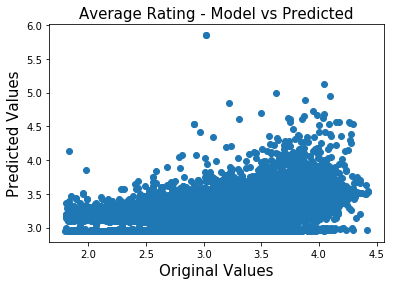

In [217]:
plt.scatter(data.AverageRating,lm.predict(X))
plt.xlabel('Original Values',size=15)
plt.ylabel('Predicted Values',size=15)
plt.title('Average Rating - Model vs Predicted',size=15)
plt.show()

In [215]:
from sklearn.metrics import r2_score

In [216]:
r2_score(data.AverageRating,lm.predict(X))

0.17051863098375541

The simple linear regression model has a very low r2 score and performs poorly. This indicates that the average rating is clearly independent of any of the variables in the dataset. It is really hard to say which beer will get high ratings. 